### Importing Necessary modules and .csv file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('GSS.csv')

df.head()

,Gss year for this respondent,Ballot used for interview,Rs income in constant $,R is how tall,R weighs how much,Rs religious preference,Respondents income,Total family income,Number of persons in household,Race of respondent,Respondents sex,Rs highest degree,Age of respondent,Number of children,Marital status,Labor force status,Respondent id number,R's family's negative attitudes about mh problems
0,2000,Ballot a,5985.0,Not applicable,Not applicable,Protestant,$8000 to 9999,No answer,2.0,White,Male,Bachelor,26,0,Never married,Working fulltime,1.0,Not applicable
1,2000,Ballot c,5985.0,Not applicable,Not applicable,Protestant,$8000 to 9999,$8000 to 9999,1.0,White,Female,High school,48,2,Divorced,Working fulltime,2.0,Not applicable
2,2000,Ballot b,0.0,Not applicable,Not applicable,Protestant,Not applicable,$15000 - 19999,1.0,White,Female,High school,67,5,Widowed,Keeping house,3.0,Not applicable
3,2000,Ballot b,0.0,Not applicable,Not applicable,Orthodox-christian,Not applicable,$25000 or more,1.0,White,Female,High school,39,1,Never married,Working fulltime,4.0,Not applicable
4,2000,Ballot b,0.0,Not applicable,Not applicable,None,Not applicable,$25000 or more,1.0,White,Female,Junior college,25,0,Divorced,Working fulltime,5.0,Not applicable


In [2]:
df.drop(columns= ["R's family's negative attitudes about mh problems", 
                  "Ballot used for interview", "Respondent id number", "Respondents income" ], inplace = True)

In [3]:
df.rename(columns={"Gss year for this respondent": "Year", 'Rs income in constant $': 'Income', 
                       'R is how tall': 'Height','R weighs how much': 'Weight','Rs religious preference': 'Religion',
                       'Total family income': 'Family Income', 'Number of persons in household': 'Number of Household',
                         'Race of respondent': 'Race', 'Respondents sex': 'Sex', 'Rs highest degree': 'Degree Completed',
                        'Age of respondent': 'Age', 'Number of children': '# of Children'}, inplace = True)



In [4]:
df.dropna(inplace = True)

In [5]:
weight = df[df['Weight'] == 'Not applicable' ].index
weight_no = df[df['Weight'] == 'No answer' ].index
weight_not = df[df['Weight'] == "Don't know" ].index

df.drop(weight,  inplace=True)
df.drop(weight_no,  inplace=True)
df.drop(weight_not,  inplace=True)

In [6]:
#height = df[df['Height'] == 'Not applicable' ].index
height_no = df[df['Height'] == 'No answer' ].index
height_not = df[df['Height'] == "Don't know" ].index


#df.drop(height,inplace=True)
df.drop(height_not,inplace=True)
df.drop(height_no,inplace=True)

In [7]:
df.head(200)

,Gss year for this respondent,Income,Height,Weight,Religion,Family Income,Number of Household,Race,Sex,Degree Completed,Age,# of Children,Marital status,Labor force status
18945,2014,39022.5000,72,190,Catholic,$25000 or more,1.0,White,Male,Bachelor,53,0,Divorced,Working fulltime
18946,2014,39022.5000,60,97,Catholic,$25000 or more,2.0,White,Female,Bachelor,26,0,Married,Working fulltime
18948,2014,6503.7500,68,160,Catholic,$25000 or more,4.0,White,Female,Bachelor,56,2,Married,Working parttime
18958,2014,11233.7500,65,156,Catholic,$20000 - 24999,2.0,White,Female,High school,40,2,Married,Working fulltime
18960,2014,11233.7500,66,210,Catholic,$25000 or more,2.0,White,Male,High school,56,3,Married,Working parttime
18963,2014,10051.2500,68,170,Protestant,$25000 or more,2.0,White,Male,Lt high school,51,2,Married,Working fulltime
18965,2014,11233.7500,62,115,Protestant,$20000 - 24999,3.0,Black,Female,High school,30,2,Divorced,Working fulltime
18970,2014,0.0000,62,256,None,Lt $1000,1.0,Black,Female,Graduate,28,0,Never married,Working parttime
18971,2014,11233.7500,70,180,Catholic,$20000 - 24999,1.0,White,Male,High school,35,2,Separated,Working fulltime
18972,2014,47300.0000,71,225,Catholic,$25000 or more,7.0,White,Male,Bachelor,57,6,Married,Working fulltime


In [8]:
df[['Height', 'Weight']] = df[['Height', 'Weight']].apply(pd.to_numeric) 
print(df.dtypes)

Gss year for this respondent                            object
Income                                                 float64
Height                                                   int64
Weight                                                   int64
Religion                                                object
Family Income                                           object
Number of Household                                    float64
Race                                                    object
Sex                                                     object
Degree Completed                                        object
Age                                                     object
# of Children                                           object
Marital status                                          object
Labor force status                                      object
dtype: object


In [9]:

X = df.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

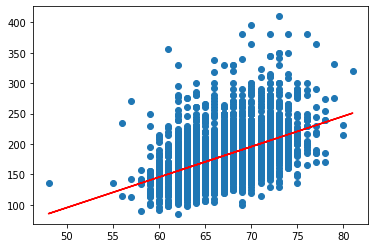

In [10]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [11]:
def regression(predictor, predicted):
    # Get names of indexes for which column Age has value 30
    weight = df[df['Weight'] == 'Not applicable' ].index
    #height = df[df['Height'] == 'Not applicable' ].index
    
    weight_no = df[df['Weight'] == 'No answer' ].index
    weight_not = df[df['Weight'] == "Don't know" ].index
    height_no = df[df['Height'] == 'No answer' ].index
    height_not = df[df['Height'] == "Don't know" ].index
 
    # Delete these row indexes from dataFrame
    df.drop(weight,  inplace=True)
    #df.drop(height,inplace=True)
    df.drop(weight_no,  inplace=True)
    df.drop(weight_not,  inplace=True)
    df.drop(height_not,inplace=True)
    df.drop(height_no,inplace=True)

    #df.drop(height_not,inplace=True)
    